In [25]:
import numpy as np

In [349]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt

from scipy.stats import norm

def greyplot(data):
    plt.imshow(data, cmap='gray', vmin=0, vmax=1)

In [401]:
N = 12
A = 64
B = 64
g_x = 28
g_y = 48
delta = 3
sigma = 1

In [402]:
mu_x = g_x + (np.arange(N) - N / 2 - .5) * delta
mu_y = g_y + (np.arange(N) - N / 2 - .5) * delta
F_x = np.fromfunction(lambda i, a: np.exp(-(a - mu_x[i])**2/(2*sigma**2)), (N, A), dtype=int)
F_y = np.fromfunction(lambda j, b: np.exp(-(b - mu_y[j])**2/(2*sigma**2)), (N, A), dtype=int)

In [403]:
F_x = F_x / (F_x.sum(axis=1)[:, np.newaxis])
F_y = F_y / (F_y.sum(axis=1)[:, np.newaxis])

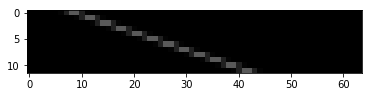

In [404]:
greyplot(F_x)

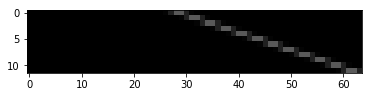

In [405]:
greyplot(F_y)

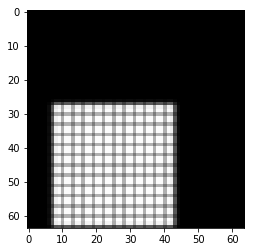

In [406]:
plt.imshow(F_y.T.dot(np.ones((N, N))/N).dot(F_x), cmap='gray')

In [407]:
import scipy.misc
face = scipy.misc.face(gray=True)

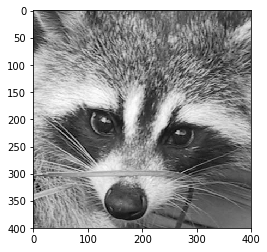

In [408]:
plt.imshow(face[100:500, 450:850], cmap='gray')

In [409]:
import skimage.transform

In [410]:
face = skimage.transform.resize(face[100:500, 450:850], (A, B))

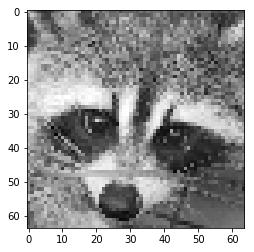

In [411]:
plt.imshow(face, cmap='gray')

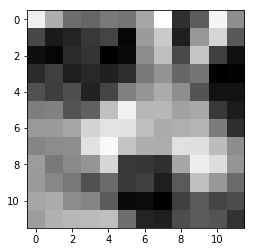

In [412]:
filtered_face = F_y.dot(face).dot(F_x.T)
plt.imshow(filtered_face, cmap='gray')

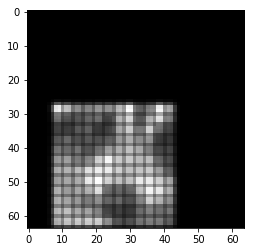

In [413]:
filtered_face = F_y.T.dot(filtered_face).dot(F_x)
plt.imshow(filtered_face, cmap='gray')